In [16]:
import numpy as np
import pywt
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

Feature Engineering

(102, 102, 3)


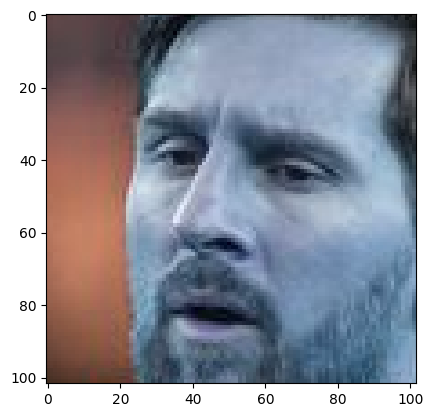

In [17]:
img = cv2.imread('./cropped_images/lionel_messi/lionel_messi2.png')
print(img.shape) 
plt.imshow(img)

In [18]:
  
#wavelet transform function
def w2d(img, mode='haar', level=1):
    imArray = img
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

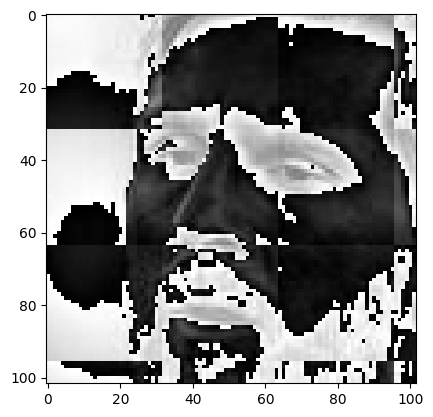

In [19]:
im_har = w2d(img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [20]:
import json
with open("./celebrity_file_name_dict.json", "r") as f:
    loaded_dict = json.load(f)
loaded_dict

{'lionel_messi': ['./cropped_images/lionel_messi/lionel_messi1.png',
  './cropped_images/lionel_messi/lionel_messi2.png',
  './cropped_images/lionel_messi/lionel_messi3.png',
  './cropped_images/lionel_messi/lionel_messi4.png',
  './cropped_images/lionel_messi/lionel_messi5.png',
  './cropped_images/lionel_messi/lionel_messi6.png',
  './cropped_images/lionel_messi/lionel_messi7.png',
  './cropped_images/lionel_messi/lionel_messi8.png',
  './cropped_images/lionel_messi/lionel_messi9.png',
  './cropped_images/lionel_messi/lionel_messi10.png',
  './cropped_images/lionel_messi/lionel_messi11.png',
  './cropped_images/lionel_messi/lionel_messi12.png',
  './cropped_images/lionel_messi/lionel_messi13.png',
  './cropped_images/lionel_messi/lionel_messi14.png',
  './cropped_images/lionel_messi/lionel_messi15.png',
  './cropped_images/lionel_messi/lionel_messi16.png',
  './cropped_images/lionel_messi/lionel_messi17.png',
  './cropped_images/lionel_messi/lionel_messi18.png',
  './cropped_images/l

In [21]:
#generate number for each of the celebrity name
class_dict = {}
count = 0
for celebrity_name in loaded_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [22]:
x = []
y = []
for celebrity_name, training_files in loaded_dict.items():
    print(celebrity_name)
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:  #this is because we deleted some images manually
            continue
        scaled_raw_img = cv2.resize(img,(32,32))
        im_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(im_har,(32,32))
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1),scaled_img_har.reshape(32*32,1)))  #vertically stack the image
        x.append(combined_img)
        y.append(class_dict[celebrity_name])


lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [25]:
len(x)

175

In [26]:
len(y)

175

In [27]:
len(x[0])

4096

In [29]:
x = np.array(x).reshape(len(x),len(x[0])).astype(float)
x.shape

(175, 4096)

In [30]:
x[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [31]:
x

array([[100., 129., 140., ..., 237., 234., 232.],
       [ 90.,  66.,  67., ...,  36., 247.,  23.],
       [ 42.,  44.,  51., ...,   4.,  55.,   5.],
       ...,
       [211., 222., 226., ..., 213., 178.,  17.],
       [252., 252., 252., ..., 101., 102.,   3.],
       [ 25.,  25.,  27., ...,  75.,  41.,  51.]])

In [32]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

Model Training

In [36]:
#using support vector machine
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf',C=10))])

In [56]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [57]:
pipe.score(x_test,y_test)

0.9142857142857143

In [58]:
len(x_test)

35

In [61]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       0.33      1.00      0.50         1
           3       1.00      0.75      0.86         8
           4       0.86      0.86      0.86         7

    accuracy                           0.91        35
   macro avg       0.84      0.92      0.84        35
weighted avg       0.95      0.91      0.92        35



GridSearch to try out different models with different paramets.

In [107]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [108]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [110]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score_val': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score_val','best_params'])
df

,model,best_score_val,best_params
0,svm,0.828571,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635714,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871429,{'logisticregression__C': 1}


Above results are seen on validation data

In [111]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [112]:

results = []
# Iterate over each model in best_estimators
for model_name, model in best_estimators.items():
    accuracy = model.score(x_test, y_test)
    results.append({'model': model_name, 'best_score_test': accuracy})

df2 = pd.DataFrame(results)
df2

,model,best_score_test
0,svm,0.914286
1,random_forest,0.600000
2,logistic_regression,0.885714


above results are seen on test data

In [113]:
new_df = df.merge(df2, left_on='model', right_on='model')
new_df

,model,best_score_val,best_params,best_score_test
0,svm,0.828571,"{'svc__C': 1, 'svc__kernel': 'linear'}",0.914286
1,random_forest,0.635714,{'randomforestclassifier__n_estimators': 10},0.600000
2,logistic_regression,0.871429,{'logisticregression__C': 1},0.885714


In [114]:
new_df['average_best_score'] = (new_df['best_score_val'] + new_df['best_score_test']) / 2
new_df['best_parameters'] = new_df['best_params']
new_df.drop(['best_params'], axis = 1, inplace=True)
new_df

,model,best_score_val,best_score_test,average_best_score,best_parameters
0,svm,0.828571,0.914286,0.871429,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.635714,0.600000,0.617857,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.871429,0.885714,0.878571,{'logisticregression__C': 1}


Avg best score for svm and logistic regression are simila, so we can choose any of them. I choose svm.

In [117]:
best_classifier = best_estimators['svm']

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_classifier.predict(x_test))
cm

array([[10,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0],
       [ 0,  0,  1,  0,  0],
       [ 0,  1,  1,  6,  0],
       [ 1,  0,  0,  0,  6]], dtype=int64)

{'lionel_messi': 0, 'maria_sharapova': 1, 'roger_federer': 2, 'serena_williams': 3, 'virat_kohli': 4}


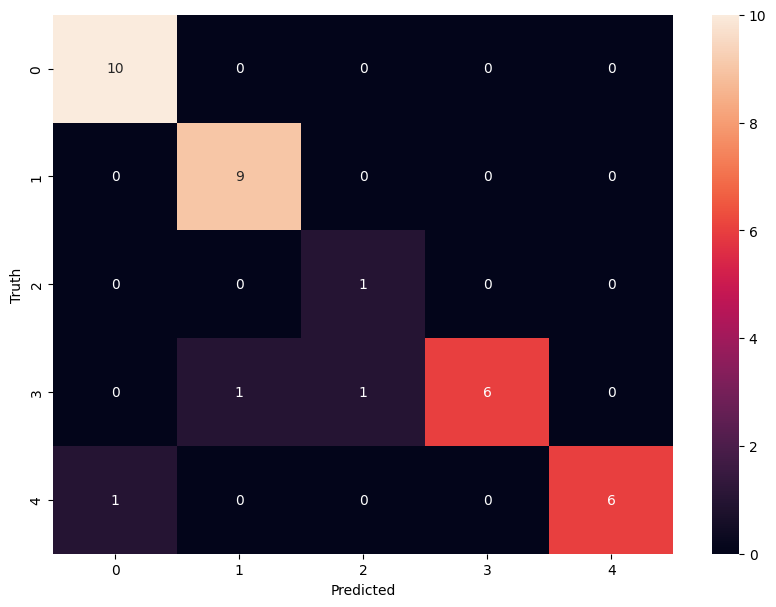

In [121]:
#visualization of confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(class_dict)

Svaing the model

In [125]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_classifier, 'model.pkl') 
#save class dictionary
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))